In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('wine_data.csv' , header=None , usecols=[0,1,2])
df.columns=['Class Label' , 'Alcohol' , 'Malic Acid']
df.sample(5)

,Class Label,Alcohol,Malic Acid
127,2,11.79,2.13
132,3,12.81,2.31
130,3,12.86,1.35
151,3,12.79,2.67
30,1,13.73,1.50


C:\Users\AlokS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

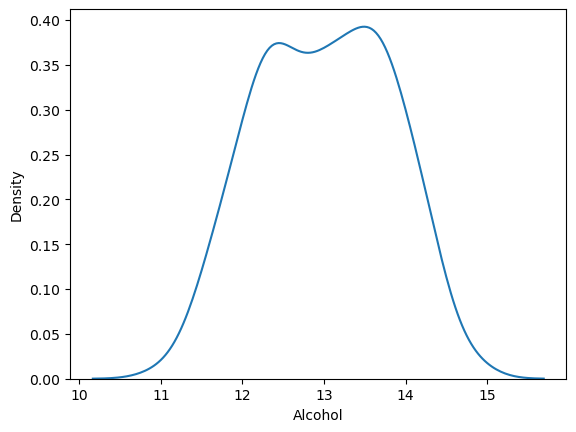

In [19]:
sns.kdeplot(df['Alcohol'])

C:\Users\AlokS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic Acid', ylabel='Density'>

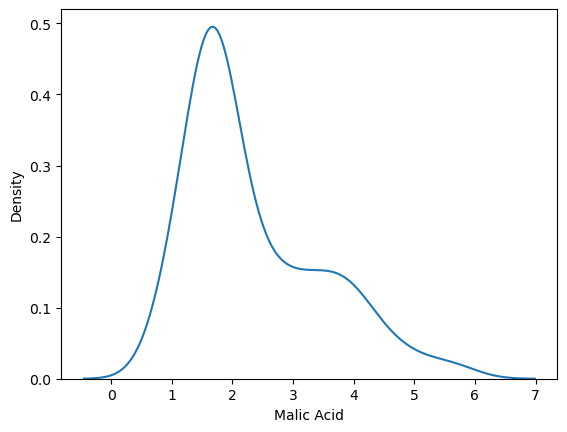

In [21]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

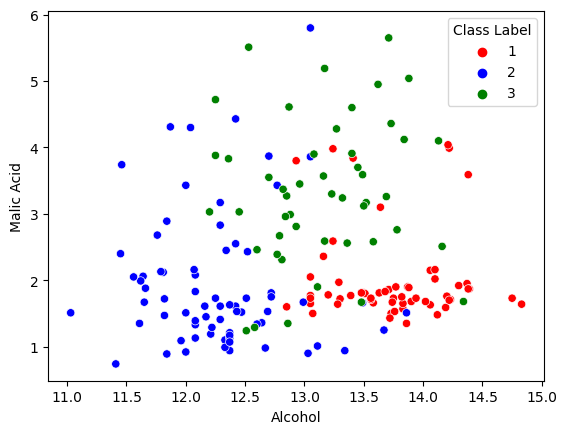

In [38]:
color_dict = {1:'red' , 2:'blue' , 3:'green'}
sns.scatterplot(x=df['Alcohol'] , y=df['Malic Acid'] ,hue=df['Class Label'], palette=color_dict)

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('Class Label' , axis=1),
                                                      df['Class Label'],
                                                      test_size=0.3,
                                                      random_state=0)

In [42]:
X_train.shape ,X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [53]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [55]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [57]:
# observation
# after normalization values are between 0-1 range

Text(0.5, 1.0, 'After Scaling')

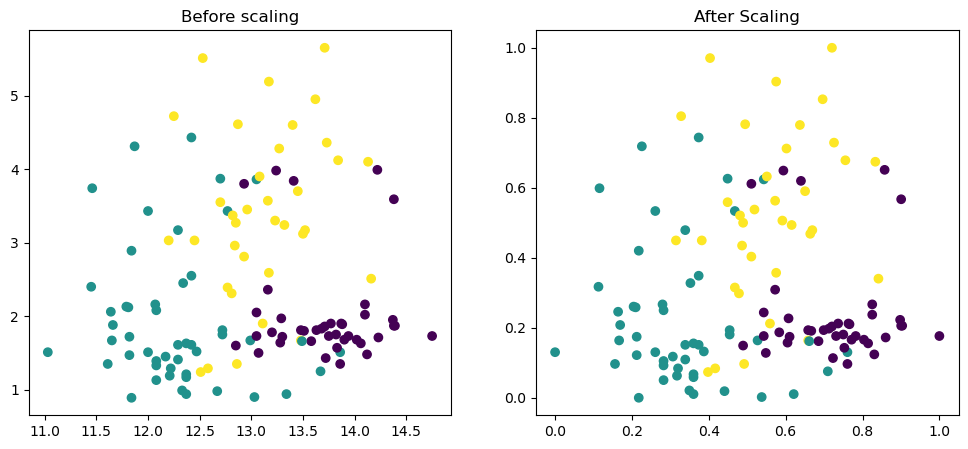

In [63]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'], c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Alcohol'] , X_train_scaled['Malic Acid'] , c=y_train)
ax2.set_title('After Scaling')

In [65]:
# observation
# values are squised between 0 to 1 after scaling

C:\Users\AlokS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AlokS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AlokS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AlokS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

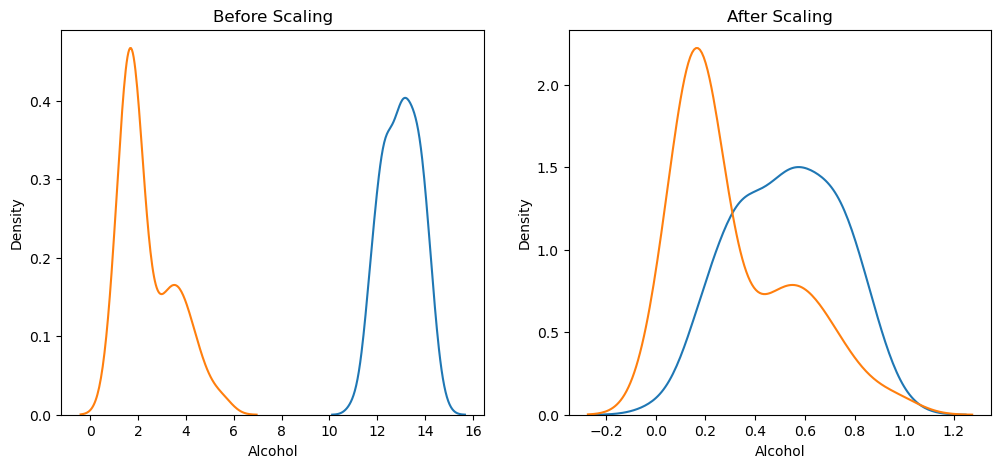

In [69]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'] ,ax=ax1)
sns.kdeplot(X_train['Malic Acid'] ,ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'] ,ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'] ,ax=ax2)

In [71]:
# observation
# before scaling the range of malic acid was less than alcohol 
# after scaling both are in same range